# Mfundo Monchwe
## 20172604
##Advanced Machine Learning
**Problem Statement**

Our start-up company has identified a market for developing Machine Learning Web Applications, which are accessible to every person on a mobile phone. One of the high-priority areas for the start-up is to solve health-related challenges by building a web-based machine learning solution which can help health practitioners solve the problem of Heart Disease Diagnosis.

**Research Questions**
1. which model is appropriate to predict whether patient is sick or not
2. how are we gonna split the dataset?
3. Which one of the functional requirements to perform diagonsis?
4. how can the clients trust this model?
5. How do we choose our priors?
6. which Probability Distribution will selected for modelling?

**Objectives**
1. Probabilistic Machine Model

Using Bayesian Formula:

$P(\theta|D)$ $=$ $\frac{P(\theta)P(D|\theta)} {P(D)}$

Where $P(\theta|D)$ ~ $Posterior$   $for$ $\theta$ $given$ $D$ $and$ $P(D|\theta)$ $~ Likelihood for$ $\theta$ 

$P(\theta)$ ~ $for$ $\theta$ and $P(D)$ $~$ 

Evidence of the model which we can simplify it as as:

$P(Model|Data)$ $=$ $\frac{P(Model)P(Data|Model)} {P(Data)}$

Model selection will be informed by the principle of Occam's Razor by selecting the easiest model that best explains the relation between the features $x_is$ and target variable $y_i$

$P(Model_i|Data)$ =$\frac{P(Model_i)P(Data|Model_i)} {P(Data)}$ 


The final selected model will be used to predict whether the patient is sick or not with the quantification of the uncertainty of the model which also can be simplified as:

$P(y_i|data,\theta)$ = $\int P(y_i|data,\theta)P(\theta|data)d\theta$ 




2. Splitting the dataset into 80% training and 20% test

There are 4 important steps for pre-processing data


*   Split the data set in Training and Validation sets
*   if there are missing values we take care of them
*   Taking care of Categorical Features
*   We Normalize the dataset

3.  Using  $X_is$ and $Y_i$
4. we will trace the model using arviz to check how uncertain and certain our model is
5. will be answered during the process
6. Bernoulli Distribution since we have two ouputs 1 Sick or 0 not sick





In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import arviz as az
from sklearn.model_selection import train_test_split


# Introduction to Heart Dataset
## Dataset Information
This dataset contains 76 attribtues, but it was brought down to subset of 14 of them.
The goal of this project is to find the presence of heartdisease in the patient.
It is integer valued from 0( no presence) to 4.

**Attribute Information:**
Only 14 Attribues used:
1. #3 (age)
2. #4 (sex) (1 = male; 0 = female)
3. #9 (cp): chest pain type


*   Value 1: typical angina
*   Value 2: atypical angina
*   Value 3: non-anginal pain
*   Value 4: asymptomatic


4. #10 (trestbps): resting blood pressure(in mm Hg on admission to the hospital)
5. #12 (chol): serum cholestoral in mg/dl
6. #16 (fbs):(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg): resting electrocadiographic results
* Value 0: normal
* Value 1:  having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. #32 (thalach): Maximum heart rate achieved
9. #38 (exang): exercise induced angina (1 = yes; 0= no)
10. #40 (oldpeak): ST depression induced by exercise relative to rest
11. #41 (slope): the slope of the peak exercise ST segment
* Value 1: upsloping
* Value 2: flat
* Value 3: downsloping
12. #44 (ca): number of major vessels (0-3) colored by flourosopy
13. #51 (thal): (3=normal; 6= fixed defect; 7 = reversable defect)
14. #58 (num) (the predicted attribute)


num: diagnosis of heart diseae (angiographic disease status)
* Value 0: < 50% diameter narrowing
* Value 1: > 50% diameter narrowing

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Heart.csv to Heart.csv


# Exploratory Data Analysis (EDA)
EDA is an approach to analyzing datasets and summarizing their characteristics with visual methods.
another we can define EDA is that it is a pre-processing step to understand our data, although we understand that there are many ways (or techniques) and step in performing EDA, however, numeroous of them are specific in focusing on either visualizatin or distribution, and are incomplete.
EDA is used for seeking what the data can tell us before we performe the modelling task. it is not a easy job to search through column numbers or a whole spreadsheet and determine very important characteristics of the data. this may be exhausting and boring to derive insighs by looking at plain digits.



In [4]:
dt = pd.read_csv('Heart.csv', delimiter=';')
dt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
dt.shape

(303, 14)

In [6]:
dt.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#checking the type of variable
dt.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [9]:
dt.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:

dt['ca'].unique()

array([0, 2, 1, 3, 4])

In [11]:
#counting the number in  of each category descending order
dt.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [12]:
#finding row '4'
dt[dt['ca']==4]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [13]:
dt.loc[dt['ca']==4, 'ca'] = np.NaN

In [14]:
dt['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [15]:
dt.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
dt.loc[dt['thal']==0, 'thal'] = np.NaN

In [17]:
dt[dt['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [18]:
dt['thal'].unique()

array([ 1.,  2.,  3., nan])

In [19]:
#Checking missing values
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [20]:
dt = dt.fillna(dt.median())
dt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

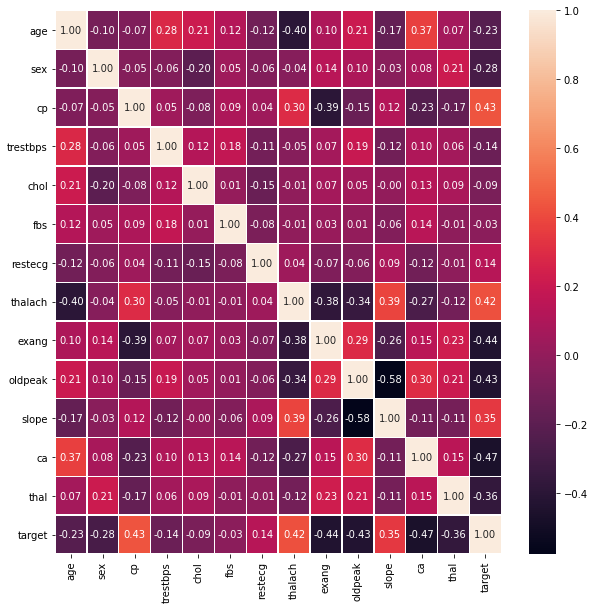

In [21]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dt.corr(), annot= True, linewidths=0.5, fmt= '.2f', ax=ax)
plt.show()

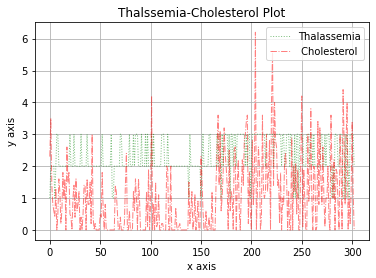

In [22]:
dt.thal.plot(kind = 'line', color = 'g', label = 'Thalassemia', linewidth =1,
             alpha = 0.5, grid = True, linestyle = ':')
dt.oldpeak.plot(color = 'r', label = ' Cholesterol', linewidth =1, alpha =0.5,
                grid = True, linestyle ='-.')

plt.legend(loc='upper right')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Thalssemia-Cholesterol Plot')
plt.show()

A blood disorder called 'Thalassemia
(3 = normal, 6= fixed defect, 7 = reversable defect

#Scatter Plot
Visualization with **Scatter plot** relation of **age** and **Cholesterol**

Text(0.5, 1.0, 'Age-Cholesterol Plot')

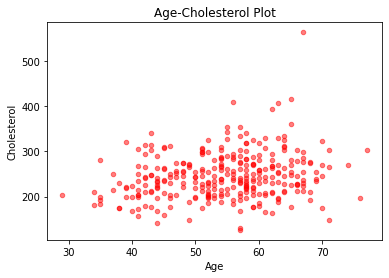

In [23]:
dt.plot(kind = 'scatter', x ='age', y = 'chol',
        alpha = 0.5, color = 'red')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Age-Cholesterol Plot')

# Histogram
**Age frequency**

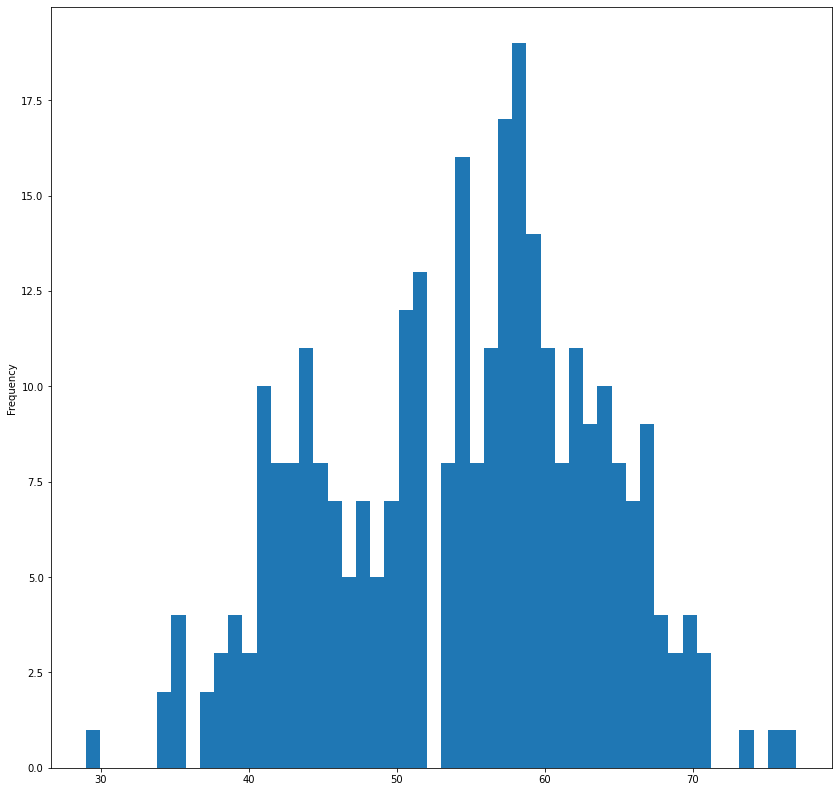

In [24]:
dt.age.plot(kind='hist', bins =50, figsize=(14,14))
plt.show()

# Feature Selection
Feature selection is the process where we manually or automatically we select features that contribute mostly to our prediction variable $y_i$ our output basically selecting feature $X_is$ that will assist us in predicting $Y$ whether the patient is  (1 = sick or 0 = not sick). having irrelevant features in our data can decrease the accuracy of our models and make our models learn vased on irrelevant features. 

In [28]:
#suppose we make our target 'age' to guess the risk heart disease
X = dt.iloc[:,1:14] #independent columns except age
#target column
y = dt.iloc[:,0]

In [29]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)# inbuilt class

[0.03581105 0.07180016 0.14387082 0.15532409 0.02984785 0.05508649
 0.15335666 0.03506048 0.1191853  0.05851433 0.06272722 0.05260315
 0.02681239]


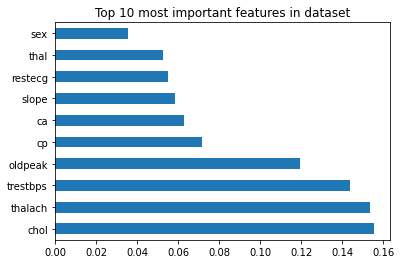

In [30]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 most important features in dataset')
plt.show()

from the graph above, we can deduce that, chol, thalach, trestbps, oldpeak and cp (maybe ca) are the most important features for heart disease prediction



now lets try our problem  by guessing the risk heart disease according to cp values, so in the next case our target is'cp'

In [31]:
x_dt = dt.drop(['cp'], axis =1)
X = x_dt.iloc[:,0:13] #independent columns except cp
y = dt.iloc[:,2] #target column cp

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.11526535 0.03078182 0.11948199 0.11118334 0.02538689 0.04236301
 0.13006373 0.07769109 0.09943558 0.05082847 0.05904534 0.04776693
 0.09070646]


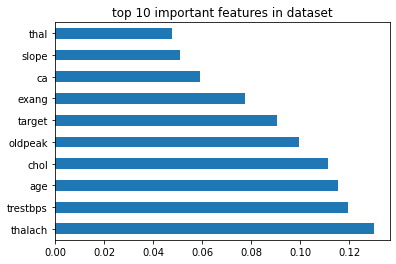

In [34]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('top 10 important features in dataset')
plt.show()


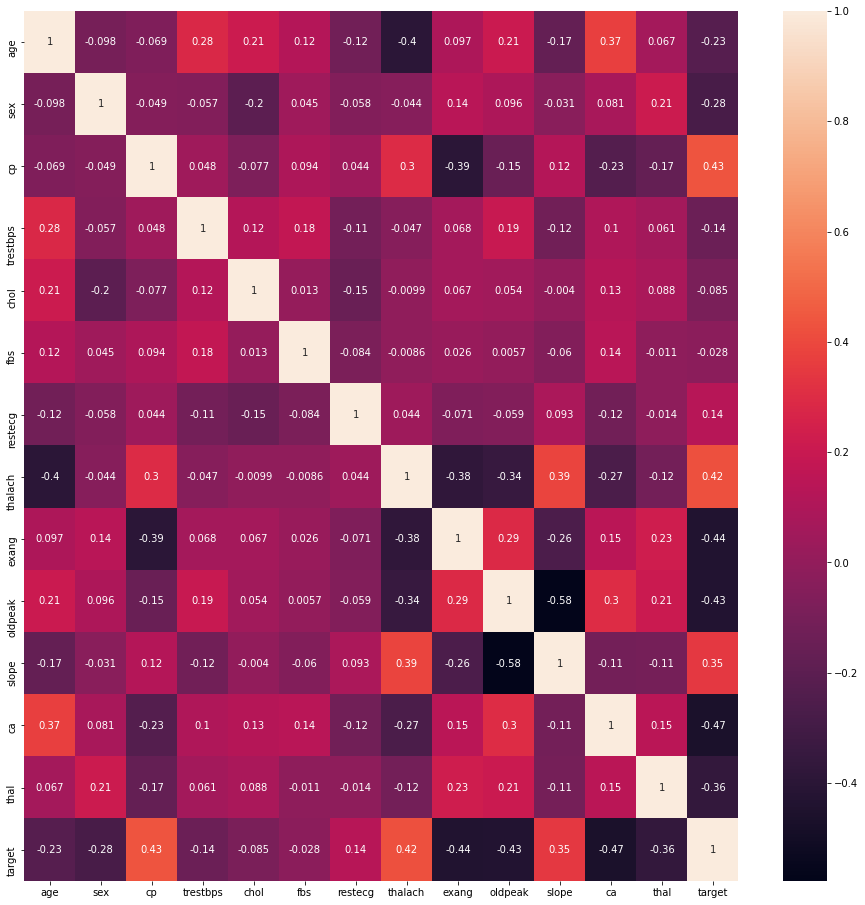

In [37]:
#Using heatmap
X = x_dt.iloc[:,0:13]
y = dt.iloc[:,2]
corrmat = dt.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(16,16))
g = sns.heatmap(dt[top_corr_features].corr(),annot=True,
                cmap = 'rocket')

given heatmap and feature importance above, we can also deduce that thalach, trestbps,age,chol,oldpeak,target, exang are most important features for this problem.

Feature importance basically gives us a score for each feature of our data, the higher the score more important or relevant feature towards our output (or prediction) $y_i$ variable

In [38]:
x_dt = dt.drop(['target'], axis =1)
X = x_dt.iloc[:,0:12] #independent columns except target
y = dt.iloc[:,13] #target column target


In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.07738722 0.0685919  0.12995841 0.0701942  0.06976263 0.0212965
 0.03413596 0.09556554 0.11594758 0.09101373 0.07641723 0.14972909]


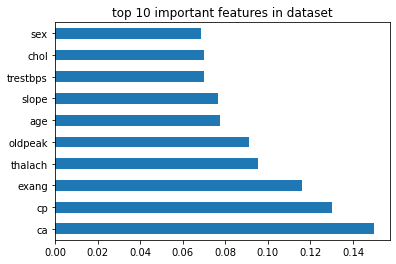

In [40]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('top 10 important features in dataset')
plt.show()
